<a href="https://colab.research.google.com/github/gaurav4288/Computer_vision/blob/main/9_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine vs Vanilla Linear Classifier


<h2>Table of Contents</h2>
<p>We will be classifying the popular handwritten data set which we can find in the sklearn library and comparing the results of the logistic regression and SVM.  In the Sklearn library, there are several ways to use logistic regression for multiclass applications; in this lab, we will use  the `multinomial` option; this is like Softmax function we discussed before</p>

<ul>
    <li>Plotting an Image</li>
    <li>Preprocess data for Logistic Regression</li>
    <li>Logistic Regression with SkLearn</li>
    <li>SVM for Image Classification with SkLearn</li>
</ul>
<p>Estimated Time Needed: <strong>60 min</strong></p>

<hr>


## Load Important Libraries and Digit Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
digits = datasets.load_digits()

In [3]:
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images), -1))

## Visualize Some Handwritten Images in the Dataset


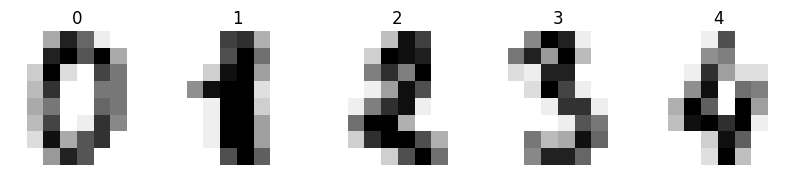

In [4]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

## Divide Images into Training and Test Set


In [6]:
X_train, X_test, y_train, y_test = train_test_split(flatten_digits, target, test_size=0.2)

## Hand-written classification with Logistic Regression


In [7]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [8]:
logit = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

In [9]:
logit.fit(X_train_logistic, y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [10]:
y_pred_logistic = logit.predict(X_test_logistic)

In [11]:
print("Accuracy: "+str(logit.score(X_test_logistic, y_test)))

Accuracy: 0.8166666666666667


Lets plot out the confusion matrix, each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.


In [12]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

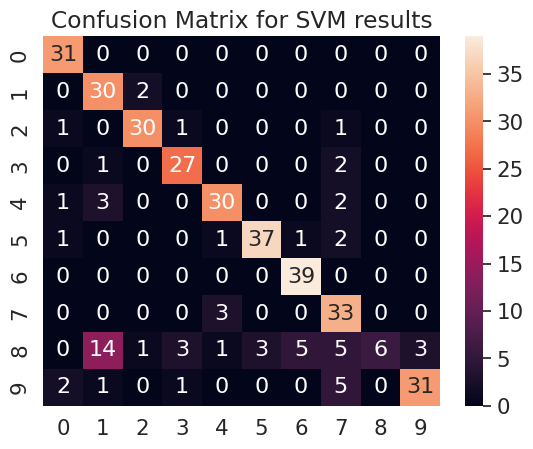

In [13]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## Hand-Written Classification with SVM


Create and fit the SVM model


In [14]:
svm_classifier = svm.SVC(gamma='scale')

In [15]:
svm_classifier.fit(X_train, y_train)

SVC()

In [16]:
y_pred_svm = svm_classifier.predict(X_test)

In [17]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred_svm)))

Accuracy: 0.9833333333333333


In [18]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)

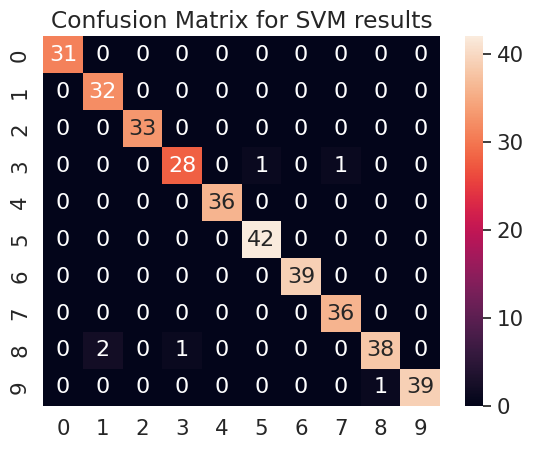

In [19]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

## Comparing both SVM and Logistic Regression with K-Fold Cross Validation

k-fold Cross validation is used when there are limited samples, the handwritten dataset contains about 1800 samples, this will give an opportunity for all the data to be in the training and test set at different given times. We will add <code>l2</code> regularization to visualize how well they both do against SVM.


In [31]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(n_splits=10, random_state=10, shuffle=True)
    if name == 'SVM':
        X = flatten_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flatten_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

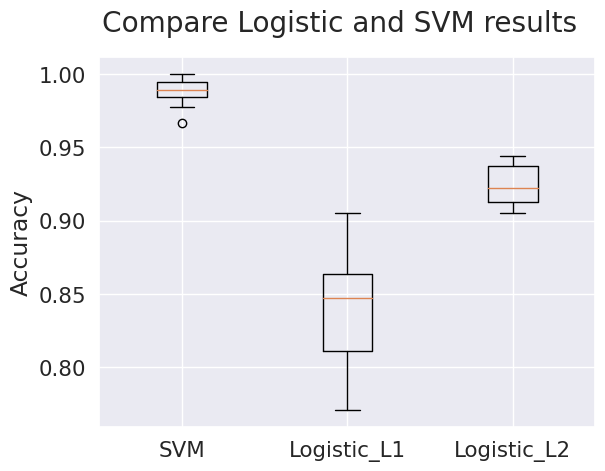

In [32]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()